In [1]:
import os,sys
from urllib import request
from bs4 import BeautifulSoup
import requests
import pandas as pd

#### Import Postal Code data of Vancouver

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V"
data = pd.read_html(url)[0]

In [3]:
#get size of the table
x, y = data.shape
#define dataframe columns
columns_name = ['PostalCode','Borough','Neighborhood']

#instantiate datafram
df = pd.DataFrame(columns = columns_name)

#### import postal code, borough and neighborhood information into the pre-defined data frame

In [4]:
for i in range(0,y):
    for j in range(0,x):
        values = data[i][j]
        if(values[3:12] == "Vancouver"):
            postal_code = values[0:3]
            borough = values[3:12]
            neighborhood = values[12:len(values)]
            neighborhood = neighborhood.replace("/",",")
            neighborhood = neighborhood.replace("(","")
            neighborhood = neighborhood.replace(")","")
            df = df.append({'PostalCode':postal_code,
                        'Borough':borough,
                        'Neighborhood':neighborhood},ignore_index=True)
df            

,PostalCode,Borough,Neighborhood
0,V5K,Vancouver,North Hastings-Sunrise
1,V5L,Vancouver,North Grandview-Woodland
2,V5M,Vancouver,"South Hastings-Sunrise , North Renfrew-Colling..."
3,V5N,Vancouver,"South Grandview-Woodland , NE Kensington-Cedar..."
4,V5P,Vancouver,"SE Kensington-Cedar Cottage , Victoria-Fraserview"
5,V5R,Vancouver,South Renfrew-Collingwood
6,V5S,Vancouver,Killarney
7,V5T,Vancouver,East Mount Pleasant
8,V5V,Vancouver,"West Kensington-Cedar Cottage , NE Riley Park-..."
9,V5W,Vancouver,"SE Riley Park-Little Mountain , SW Kensington-..."


In [5]:
#import geospatial coordinates data
df_cor = pd.read_csv("https://raw.githubusercontent.com/zch401/coursera_capstone_project/master/Vancouver_Geospatial_Coordinates.csv")

In [6]:
df_cor.head()

,Postal Code,Latitude,Longitude
0,V5K,49.2807,-123.0397
1,V5L,49.2795,-123.0667
2,V5M,49.2600,-123.0398
3,V5N,49.2551,-123.0667
4,V5P,49.2220,-123.0683


In [7]:
#assigan coordinates for each neighborhood
df['Latitude'] = df_cor['Latitude']
df['Longitude'] = df_cor['Longitude']

In [8]:
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,V5K,Vancouver,North Hastings-Sunrise,49.2807,-123.0397
1,V5L,Vancouver,North Grandview-Woodland,49.2795,-123.0667
2,V5M,Vancouver,"South Hastings-Sunrise , North Renfrew-Colling...",49.2600,-123.0398
3,V5N,Vancouver,"South Grandview-Woodland , NE Kensington-Cedar...",49.2551,-123.0667
4,V5P,Vancouver,"SE Kensington-Cedar Cottage , Victoria-Fraserview",49.2220,-123.0683


### Explore and cluster the neighborhoods in Vancouver

In [9]:
#import libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 92kB 18.8MB/s eta 0:00:01
Libraries imported.


#### Coordinates for Vancouver

In [10]:
vancouver_latitude = 49.246292
vancouver_longitude = -123.116226

In [11]:
# create map of Vancouver using latitude and longitude values
map_vancouver = folium.Map(location=[vancouver_latitude, vancouver_longitude], zoom_start=12)
# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)  
    
map_vancouver

#### Define Foursquare Credentials and Version

In [12]:
CLIENT_ID = 'P42DT0WB25SH1TZT12NPKBPEK1LNELSBKGCGPBKVZHWJW2N3' # your Foursquare ID
CLIENT_SECRET = 'BKYBWWQC2EHXCLWD4E4ZI4YXO4G5KUZUXSDXGWUI3RKHIT1V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: P42DT0WB25SH1TZT12NPKBPEK1LNELSBKGCGPBKVZHWJW2N3
CLIENT_SECRET:BKYBWWQC2EHXCLWD4E4ZI4YXO4G5KUZUXSDXGWUI3RKHIT1V


#### define a function to extract top 100 venues that are within 500 meters radius for each neighborhood

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
vancouver_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
vancouver_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bentall Centre,8,8,8,8,8,8
"Central Kitsilano , Greektown",25,25,25,25,25,25
"East Fairview , South Cambie",24,24,24,24,24,24
East Mount Pleasant,23,23,23,23,23,23
Killarney,21,21,21,21,21,21
"NE Downtown , Gastown , Harbour Centre , International Village , Victory Square , Yaletown",67,67,67,67,67,67
"NW Arbutus Ridge , NE Dunbar-Southlands",3,3,3,3,3,3
"NW Dunbar-Southlands , Chaldecutt , South University Endowment Lands",2,2,2,2,2,2
"NW Shaughnessy , East Kitsilano , Quilchena",23,23,23,23,23,23


In [32]:
len(vancouver_venues)

791

In [33]:
df_pop = vancouver_venues.groupby('Venue Category').count().sort_values(['Neighborhood'], ascending=False)
df_pop

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Coffee Shop,43,43,43,43,43,43
Hotel,37,37,37,37,37,37
Café,27,27,27,27,27,27
Restaurant,24,24,24,24,24,24
Sushi Restaurant,22,22,22,22,22,22
Chinese Restaurant,21,21,21,21,21,21
Japanese Restaurant,18,18,18,18,18,18
Pizza Place,18,18,18,18,18,18
Park,17,17,17,17,17,17


In [27]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.5, 0, '')

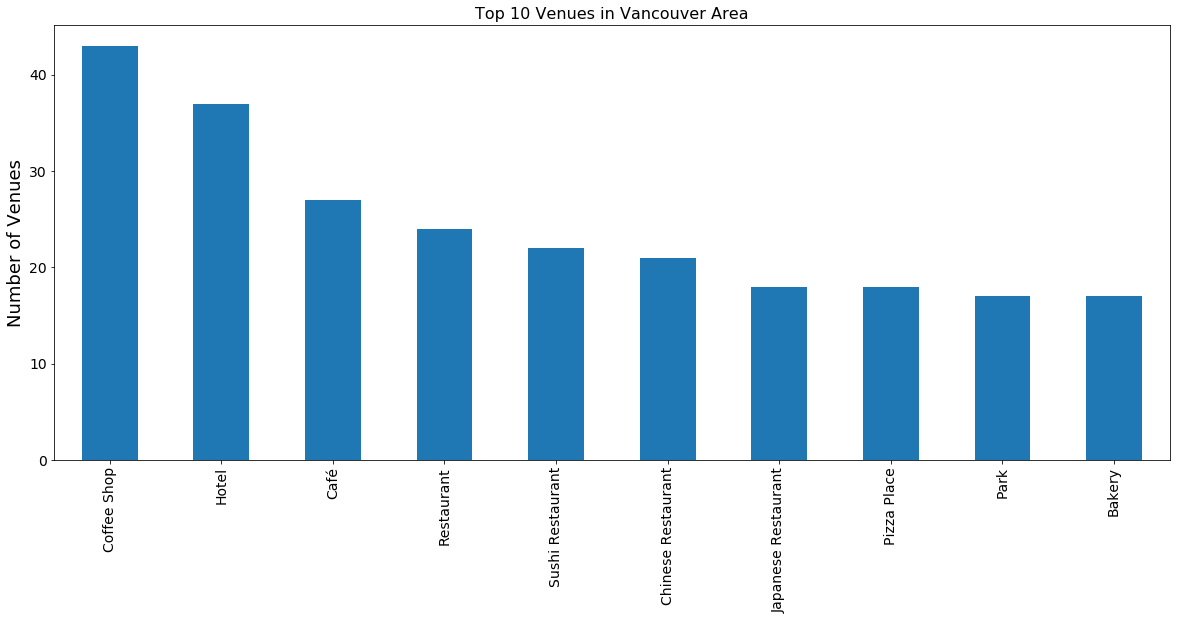

In [29]:
ax = df_pop['Venue'].head(10).plot(kind='bar', figsize=(20, 8),fontsize=14)
ax.set_title('Top 10 Venues in Vancouver Area',fontsize=16) # add title to the plot
ax.set_ylabel("Number of Venues",fontsize=18)
ax.set_xlabel("")

In [19]:
print('There are {} uniques categories.'.format(len(vancouver_venues['Venue Category'].unique())))

There are 175 uniques categories.


#### Analyze each neighborhood

In [16]:
# one hot encoding
vancouver_onehot = pd.get_dummies(vancouver_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vancouver_onehot['Neighborhood'] = vancouver_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [vancouver_onehot.columns[-1]] + list(vancouver_onehot.columns[:-1])
vancouver_onehot = vancouver_onehot[fixed_columns]

vancouver_onehot.head()

,Neighborhood,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Garden,Belgian Restaurant,Boat or Ferry,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health Food Store,Historic Site,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skating Rink,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Storage Facility,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Yoga Studio
0,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,North Hastings-Sunrise,0,0

In [17]:
vancouver_onehot.shape

(791, 176)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [18]:
vancouver_grouped = vancouver_onehot.groupby('Neighborhood').mean().reset_index()
vancouver_grouped

,Neighborhood,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Garden,Belgian Restaurant,Boat or Ferry,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health Food Store,Historic Site,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skating Rink,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Storage Facility,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Yoga Studio
0,Bentall Centre,0.00,0.25,0.125000,0.000000,0.00,0.000000,0.000000,0.00000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.0000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.125000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.0000,0.00000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.125000,0.00,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Central Kitsilano , Greektown",0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.00

#### function to sort the venues in descending order.

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### top 10 venues for each neighborhood

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = vancouver_grouped['Neighborhood']

for ind in np.arange(vancouver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vancouver_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bentall Centre,Airport Terminal,Plaza,Gastropub,American Restaurant,Outdoor Sculpture,Breakfast Spot,Electronics Store,Fast Food Restaurant,Farmers Market,Farm
1,"Central Kitsilano , Greektown",Café,Coffee Shop,Yoga Studio,Mexican Restaurant,Pub,Pizza Place,Deli / Bodega,Dessert Shop,Diner,Farmers Market
2,"East Fairview , South Cambie",Coffee Shop,Bus Stop,Park,Sushi Restaurant,Bubble Tea Shop,Bank,Chinese Restaurant,Cantonese Restaurant,Café,Cafeteria
3,East Mount Pleasant,Sushi Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Music Venue,Hotel,Sandwich Place,Pub,Café,Pizza Place,Sports Bar
4,Killarney,Bus Stop,Chinese Restaurant,Fast Food Restaurant,Bakery,Sandwich Place,Liquor Store,Farmers Market,Shopping Mall,Juice Bar,Sushi Restaurant
5,"NE Downtown , Gastown , Harbour Centre , Inter...",Hotel,Restaurant,Pizza Place,Ramen Restaurant,Breakfast Spot,Taco Place,Plaza,Theater,Coffee Shop,Hockey Arena
6,"NW Arbutus Ridge , NE Dunbar-Southlands",Italian Restaurant,Bakery,Caribbean Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Fair,Event Space
7,"NW Dunbar-Southlands , Chaldecutt , South Univ...",Park,Yoga Studio,Electronics Store,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Fair,Event Space
8,"NW Shaughnessy , East Kitsilano , Quilchena",Yoga Studio,Coffee Shop,Electronics Store,Japanese Restaurant,Furniture / Home Store,Gym / Fitness Center,Dim Sum Restaurant,Pharmacy,Restaurant,Food & Drink Shop
9,"NW West End , Stanley Park",Garden,Outdoor Sculpture,Park,Trail,Playground,Event Space,Dog Run,Farm,Falafel Restaurant,Fair


#### Cluster neighborhoods to 5 clusters

In [21]:
# set number of clusters
kclusters = 5

vancouver_grouped_clustering = vancouver_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vancouver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 3, 1, 0, 0], dtype=int32)

In [24]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vancouver_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
vancouver_merged = vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

vancouver_merged.dropna() # check the last columns!
vancouver_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,V5K,Vancouver,North Hastings-Sunrise,49.2807,-123.0397,0.0,Theme Park Ride / Attraction,Event Space,Theme Park,Music Venue,Sushi Restaurant,Farm,Bus Station,Fair,Sandwich Place,Pizza Place
1,V5L,Vancouver,North Grandview-Woodland,49.2795,-123.0667,0.0,Brewery,Chinese Restaurant,Italian Restaurant,Theater,Café,Asian Restaurant,Coffee Shop,Bakery,Pizza Place,Market
2,V5M,Vancouver,"South Hastings-Sunrise , North Renfrew-Colling...",49.2600,-123.0398,0.0,Bus Stop,Coffee Shop,Grocery Store,Chinese Restaurant,Sandwich Place,Electronics Store,Restaurant,Metro Station,Mexican Restaurant,Storage Facility
3,V5N,Vancouver,"South Grandview-Woodland , NE Kensington-Cedar...",49.2551,-123.0667,0.0,Café,Bakery,Church,Dog Run,Skating Rink,Bookstore,Lake,Child Care Service,Beach,Farmers Market
4,V5P,Vancouver,"SE Kensington-Cedar Cottage , Victoria-Fraserview",49.2220,-123.0683,0.0,Pizza Place,Park,Bank,Convenience Store,Motorcycle Shop,Pet Store,Pharmacy,Middle Eastern Restaurant,Café,Restaurant
5,V5R,Vancouver,South Renfrew-Collingwood,49.2397,-123.0407,0.0,Bar,Fish & Chips Shop,Park,Hotel,Asian Restaurant,Bus Stop,Yoga Studio,Fast Food Restaurant,Farmers Market,Farm
6,V5S,Vancouver,Killarney,49.2175,-123.0380,0.0,Bus Stop,Chinese Restaurant,Fast Food Restaurant,Bakery,Sandwich Place,Liquor Store,Farmers Market,Shopping Mall,Juice Bar,Sushi Restaurant
7,V5T,Vancouver,East Mount Pleasant,49.2620,-123.0923,0.0,Sushi Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Music Venue,Hotel,Sandwich Place,Pub,Café,Pizza Place,Sports Bar
8,V5V,Vancouver,"West Kensington-Cedar Cottage , NE Riley Park-...",49.2480,-123.0913,0.0,Coffee Shop,Gourmet Shop,Pizza Place,Sandwich Place,Bakery,Café,Ice Cream Shop,Convenience Store,Greek Restaurant,Grocery Store
9,V5W,Vancouver,"SE Riley Park-Little Mountain , SW Kensington-...",49.2327,-123.0917,4.0,Chinese Restaurant,Tea Room,Diner,Fried Chicken Joint,Japanese Restaurant,Pizza Place,Sandwich Place,Indian Restaurant,Ice Cream Shop,Bus Stop


In [25]:
# create map
map_clusters = folium.Map(location=[vancouver_latitude, vancouver_longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighborhood'], vancouver_merged['Cluster Labels']):
    if(np.isnan(cluster)):
        continue
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters